# 项目：可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_penguins = pd.read_csv("/Users/hardy/Desktop/Python_file/Python_DataAnalyst/Data_Visualize/Project_Visualize/penguins.csv")
original_penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## 评估与清理数据

### 数据整齐度

In [3]:
original_penguins.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


从头部的10行数据来看，数据符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”，因此不存在结构性问题。

### 数据干净度

#### 数据类型转换

In [4]:
original_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


从输出结果来看，`original_penguins`数据共有344条观察值，`culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g`变量存在缺失值，将在后续进行评估和清理。

从输出结果数据类型方面，我们已知`species`（企鹅种类）`sex`（企鹅性别）、`island`（企鹅所在岛）都是分类数据，因此可以把数据类型都转换为Category。

In [5]:
original_penguins["species"] = original_penguins["species"].astype("category")
original_penguins["island"] = original_penguins["island"].astype("category")
original_penguins["sex"] = original_penguins["sex"].astype("category")

#### 处理缺失值

In [6]:
original_penguins.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

由上述结果显示，`culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g`和`sex`变量存在缺失值，需要进行进一步评估。

In [7]:
original_penguins[original_penguins["culmen_length_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


从`culmen_length_mm`缺失值的输出结果来看，可以怀疑就是索引`3`和`339`的两条数据在`culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g`变量中缺失造成的，可以进行进一步验证。

In [8]:
original_penguins[original_penguins["culmen_depth_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [9]:
original_penguins[original_penguins["flipper_length_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [10]:
original_penguins[original_penguins["body_mass_g"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


由上述三条输出结果，验证了前面的猜想。索引为3和339的观察值，除了种类和所属岛屿外所有变量都为空，无法为探索企鹅身体属性相关因素提供价值，因此可以把这两行直接删除。

In [11]:
original_penguins.drop(3, inplace=True)
original_penguins.drop(339, inplace=True)

对于`sex`为缺失值的数据，对其进行提取出来查看：

In [12]:
original_penguins.query('sex.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


缺失性别变量的观察值具备其它数据，仍然可以为分析提供价值。由于Pandas以及Matplotlib、Seaborn会自动忽略缺失值，可以保留这些行。

#### 处理重复数据

In [13]:
original_penguins.duplicated().sum()

0

由输出结果来看，不存在完全重复的数据。

#### 处理不一致数据

对于不一致数据而言，其可能存在于`species`（企鹅种类）`sex`（企鹅性别）、`island`（企鹅所在岛）分类数据中，因而对其进行评估：

In [14]:
original_penguins["species"].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

从输出结果来看，`species`列不存在不一致数据。

In [15]:
original_penguins["sex"].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

从输出结果来看，`sex`列里存在一个英文句号值，并不代表任何有效性别，我们应当把该值替换为`NaN`空值。

In [16]:
original_penguins['sex'] = original_penguins['sex'].replace(".", np.nan)
original_penguins['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [17]:
original_penguins["island"].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

从输出结果来看，`island`列不存在不一致数据。

#### 处理无效或错误数据

In [18]:
original_penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


从以上统计信息来看，`original_penguins`里不存在脱离现实意义的数值。

#### 存储清理后的数据

In [19]:
original_penguins.to_csv('cleaned_penguins.csv', index=False)

## 数据可视化

In [20]:
cleaned_penguins = pd.read_csv("/Users/hardy/Desktop/Python_file/Python_DataAnalyst/Data_Visualize/Project_Visualize/cleaned_penguins.csv")
cleaned_penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
338,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
339,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
340,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


我们将通过数据可视化，进行探索和分析，从图表中获得企鹅样本数据的相关洞察。

In [21]:
#设置图表色盘为"pastel"
sns.set_palette("pastel")

In [22]:
#替换成Heiti TC字体
matplotlib.rc("font",family='Heiti TC')

### 企鹅体重、嘴峰长度和深度、鳍长度的分布

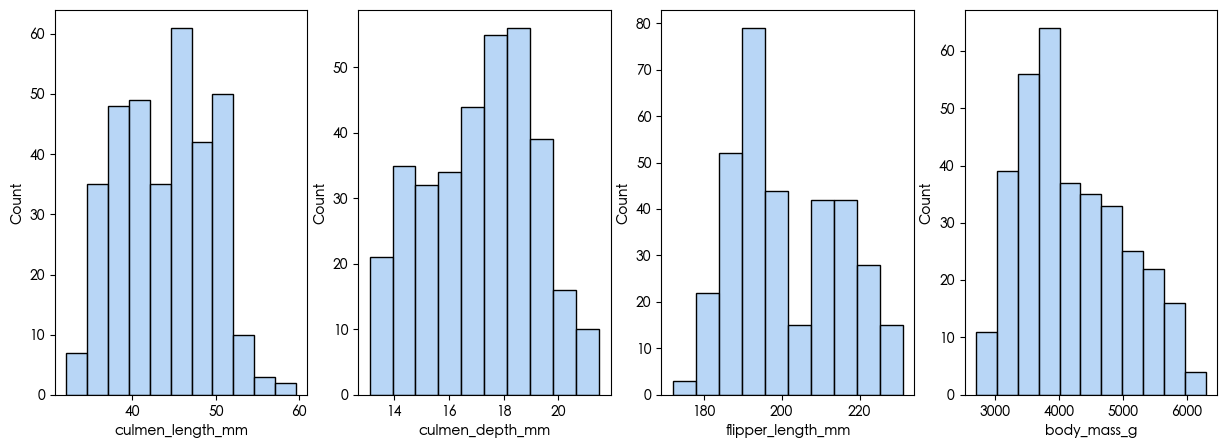

In [23]:
#插入一个一行四列的空白子表，并在其中绘制企鹅体重、嘴峰长度和深度、鳍长度分布的直方图
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
sns.histplot(data=cleaned_penguins, x="culmen_length_mm", ax=axes[0])
sns.histplot(data=cleaned_penguins, x="culmen_depth_mm", ax=axes[1])
sns.histplot(data=cleaned_penguins, x="flipper_length_mm", ax=axes[2])
sns.histplot(data=cleaned_penguins, x="body_mass_g", ax=axes[3])
plt.show()

### 企鹅种类、岛屿和性别的占比

In [24]:
species_counts = cleaned_penguins["species"].value_counts()

In [25]:
species_counts.index

Index(['Adelie', 'Gentoo', 'Chinstrap'], dtype='object', name='species')

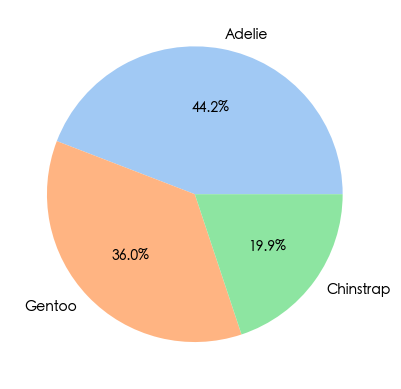

In [26]:
#绘制企鹅种类的占比的饼图
species_counts = cleaned_penguins["species"].value_counts()
plt.pie(species_counts, labels=species_counts.index, autopct="%.1f%%")
plt.show()

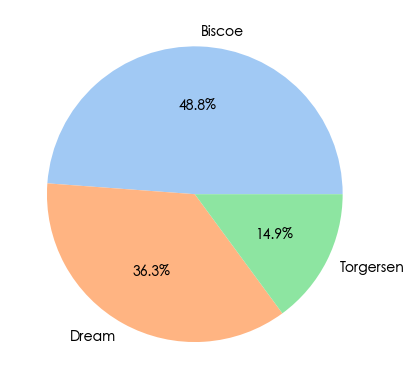

In [27]:
#绘制岛屿的占比的饼图
island_counts = cleaned_penguins["island"].value_counts()
plt.pie(island_counts, labels=island_counts.index, autopct="%.1f%%")
plt.show()

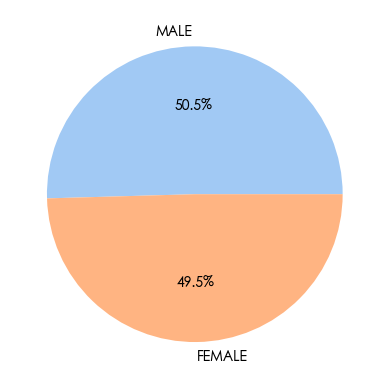

In [28]:
#绘制企鹅性别的占比的饼图
sex_counts = cleaned_penguins["sex"].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct="%.1f%%")
plt.show()

### 企鹅种类、岛屿与性别之间的关系

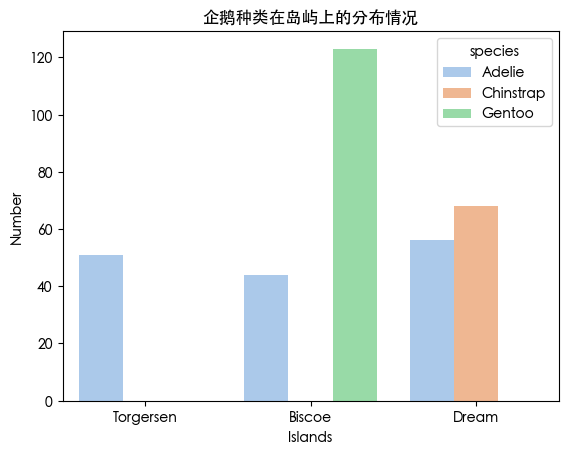

In [29]:
#企鹅种类与企鹅岛屿之间的关系
sns.countplot(cleaned_penguins, x="island", hue="species")
plt.xlabel("Islands")
plt.ylabel("Number")
plt.title("企鹅种类在岛屿上的分布情况")
plt.show()

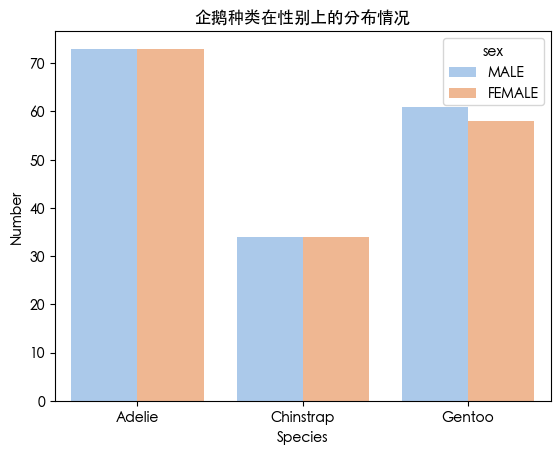

In [30]:
#企鹅种类与性别之间的关系
sns.countplot(data=cleaned_penguins, x="species", hue="sex")
plt.xlabel("Species")
plt.ylabel("Number")
plt.title("企鹅种类在性别上的分布情况")
plt.show()

### 查看数值之间的相关关系

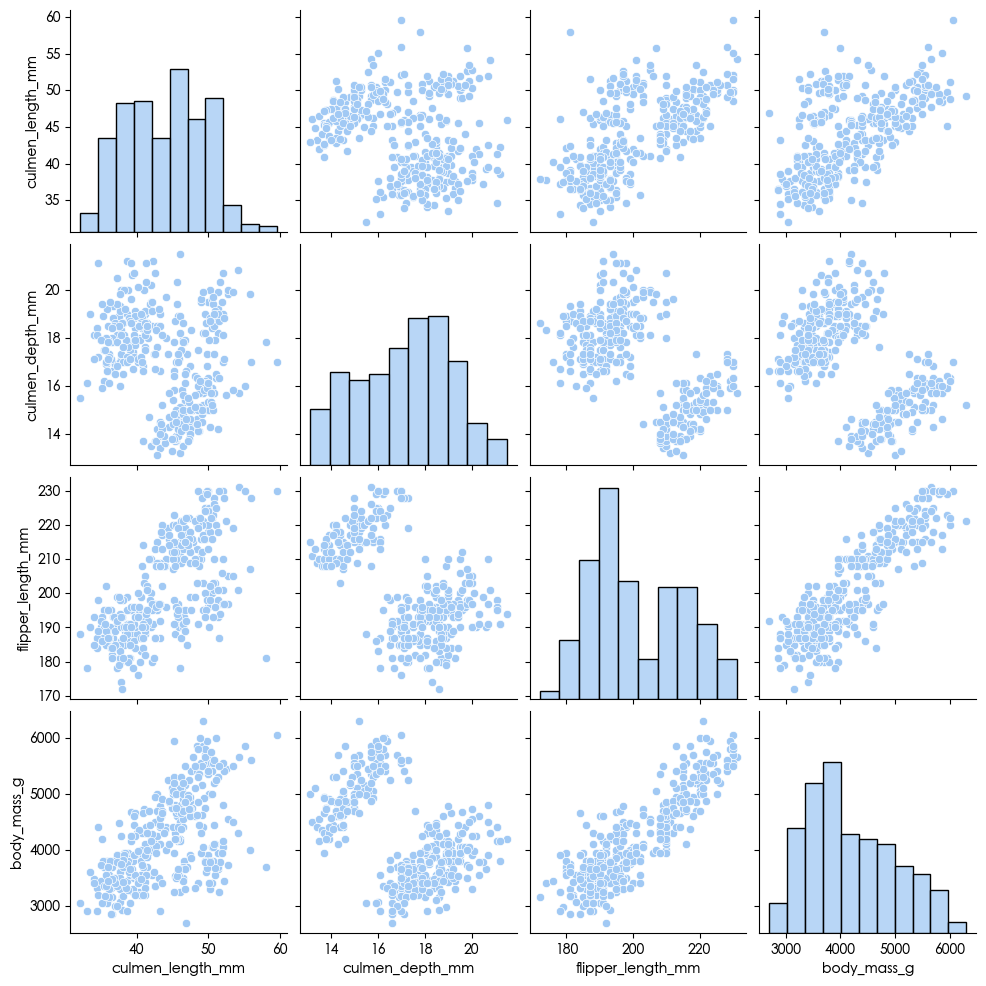

In [31]:
sns.pairplot(cleaned_penguins)
plt.show()

从直方图来看，企鹅样本的嘴峰长度、嘴峰深度、鳍长度、体重的分布不是正态分布。一方面说明，这里面可能包含了多组存在差异的样本数据，另一方面也说明样本数不够大。

另外可以在散点图中看出明显的多个集群，可能与某些因素有关，比如企鹅种类、性别，因此可以对对比进行进一步的分类。

### 根据种类查看数值之间的相关关系

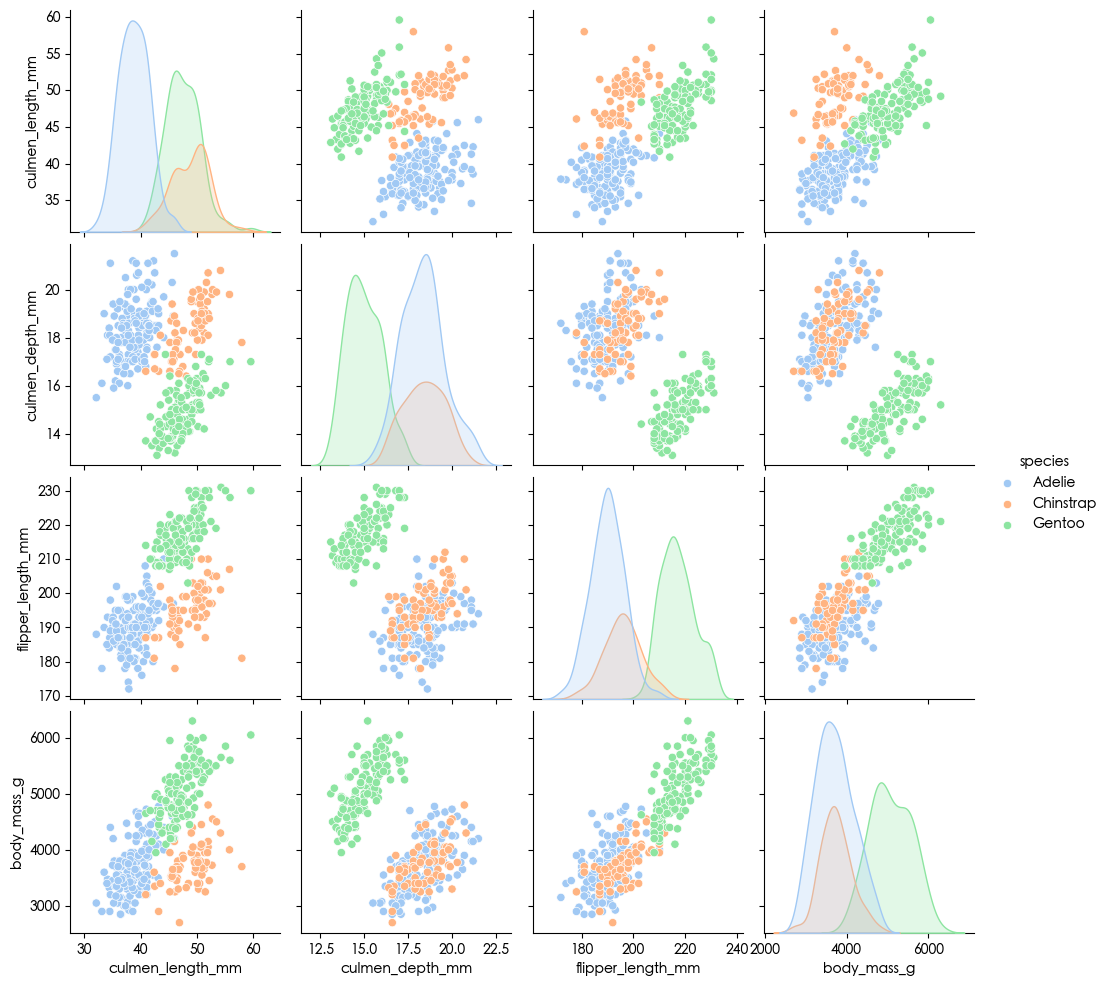

In [32]:
sns.pairplot(cleaned_penguins, hue="species")
plt.show()

同一种类的企鹅样本数据，在散点图上基本都聚在一起，说明同一种类的企鹅在嘴峰长度、嘴峰深度、鳍长度、体重之间关系上，存在相似性。这些发现有利于我们根据体重、鳍长等数值推测企鹅种类，也可以根据企鹅种类推测体重、鳍长等数值。

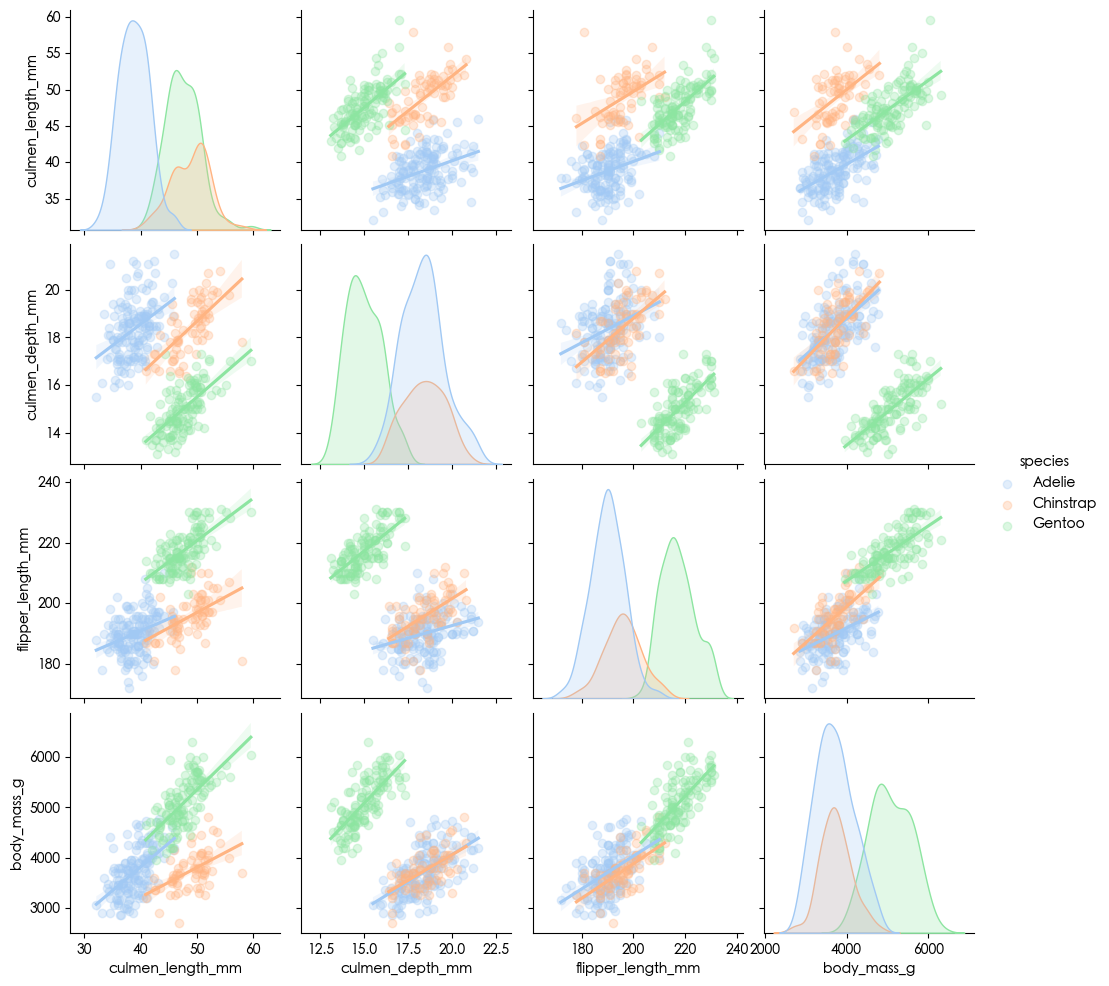

In [34]:
sns.pairplot(cleaned_penguins, hue='species', kind='reg', plot_kws={'scatter_kws': {'alpha': 0.3}})
plt.show()

散点图结合线性回归线来看，同类企鹅的属性数据之间均呈线性正比，即嘴峰越长，嘴峰越深，鳍越长，体重越重，嘴峰越短，嘴峰越浅，鳍越短，体重越轻。

从密度图的分布来看，可以得到以下关于样本的发现：
- Chinstrap和Gentoo的嘴峰长度范围较为接近，而Adelie的嘴峰长度更短。
- Adelie和Chinstrap的嘴峰深度范围较为接近，而Gentoo的嘴峰深度更短。
- Adelie的鳍长度最短，Chinstrap中等，而Gentoo的鳍长度嘴长。
- Adelie和Chinstrap的体重范围较为接近，而Gentoo的体重更大。

但不同种类的属性数值否存在统计显著性差异，仍然需要进行假设检验后才能得到结论。

### 根据性别查看数值之间的相关关系

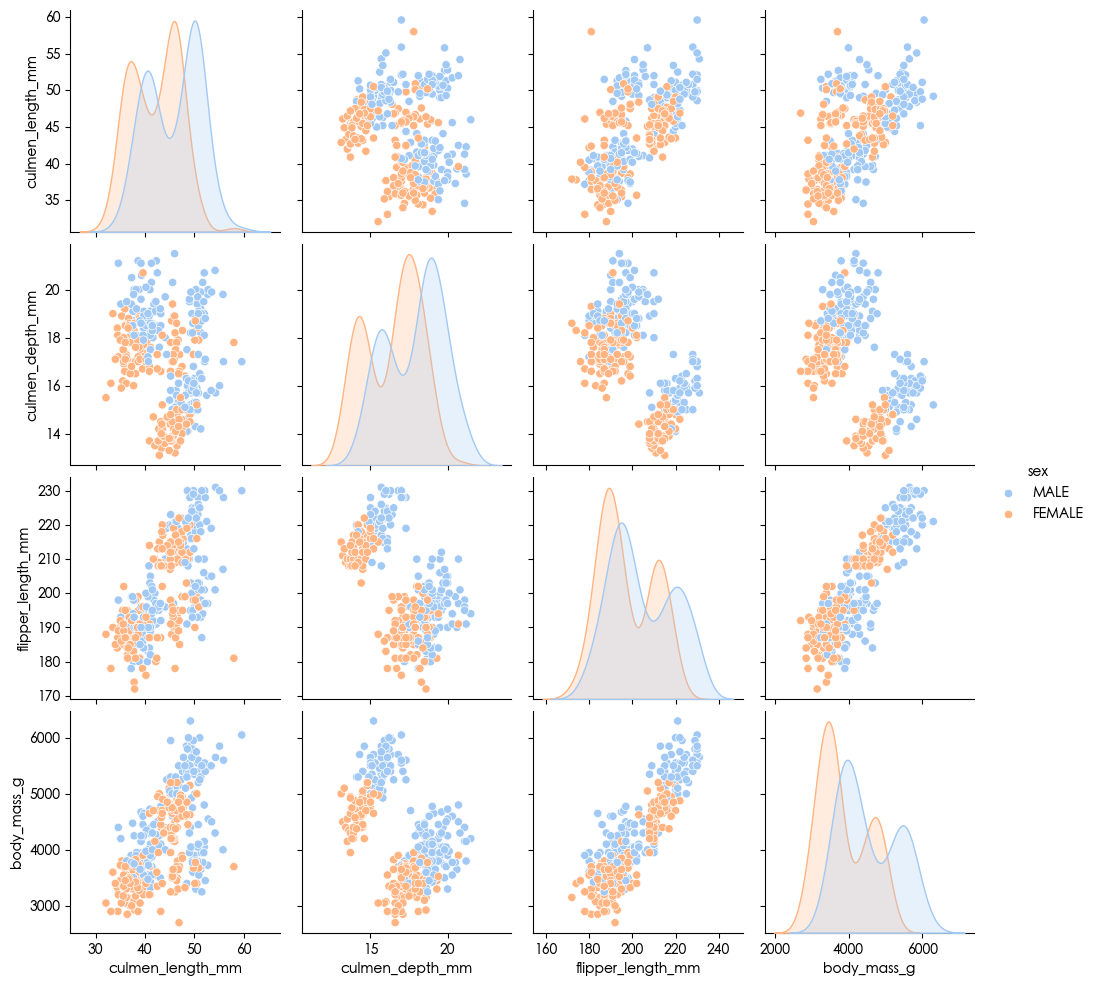

In [36]:
sns.pairplot(cleaned_penguins, hue='sex')
plt.show()

根据性别划分后可以看出，样本中雄性企鹅在各项属性数值方面大于雌性企鹅。